In [3]:
import numpy as np
import pickle

In [6]:
with open("../data/arc/1M/train.pkl", 'rb') as f:
    data = pickle.load(f)
data[0]

{'x': array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0],
        [0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]),
 'y': array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0]

In [7]:
from typing import List, Tuple, Optional

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from matplotlib.axes import Axes


TaskTuple = Tuple[
    List[np.ndarray], List[np.ndarray], List[np.ndarray], Optional[List[np.ndarray]]
]


def plot_array(axes: Axes, data: np.ndarray, title: str) -> None:
    cmap = colors.ListedColormap(
        [
            "#000000",
            "#0074D9",
            "#FF4136",
            "#2ECC40",
            "#FFDC00",
            "#AAAAAA",
            "#F011BE",
            "#FF851B",
            "#7FDBFF",
            "#870C25",
        ]
    )
    norm = colors.Normalize(vmin=0, vmax=9)

    axes.imshow(data, cmap=cmap, norm=norm)
    axes.grid(True, which="both", color="lightgrey", linewidth=0.5)
    axes.set_yticks([x - 0.5 for x in range(1 + len(data))])
    axes.set_xticks([x - 0.5 for x in range(1 + len(data[0]))])
    axes.set_xticklabels([])
    axes.set_yticklabels([])
    axes.set_title(title)


def plot_task(task: TaskTuple, predictions: Optional[List[np.ndarray]] = None) -> None:
    x_train, y_train, x_test, y_test = task
    num_train = len(x_train)
    _, axs = plt.subplots(2, num_train, figsize=(3 * num_train, 3 * 2))
    for i in range(num_train):
        plot_array(axs[0, i], x_train[i], "train-input")
        plot_array(axs[1, i], y_train[i], "train-output")
    plt.tight_layout()
    plt.show()

    num_test = len(x_test)
    _, axs = plt.subplots(2, num_test, figsize=(3 * num_test, 3 * 2), squeeze=False)

    for i in range(num_test):
        plot_array(axs[0, i], x_test[i], "test-input")
        plot_array(axs[1, i], y_test[i], "test-output")
    plt.tight_layout()
    plt.show()

    if predictions:
        num_preds = len(predictions)
        _, axs = plt.subplots(
            2, num_preds, figsize=(3 * num_preds, 3 * 2), squeeze=False
        )

        for i in range(num_preds):
            plot_array(axs[0, i], x_test[i], "test-input")
            plot_array(axs[1, i], predictions[i], "test-prediction")
            plt.tight_layout()
            plt.show()


def plot_xy(x,y) -> None:
    _, axs = plt.subplots(2, 1, figsize=(3 * 1, 3 * 2))
    plot_array(axs[0], x, "input")
    plot_array(axs[1], y, "output")
    plt.tight_layout()
    plt.show()


sample id=25445


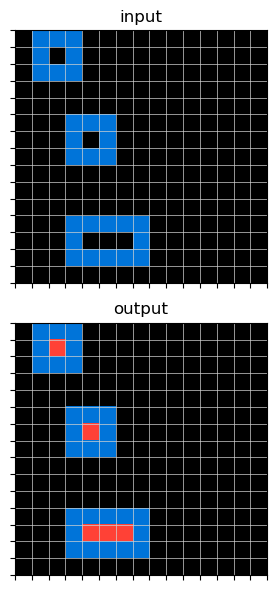

sample id=154039


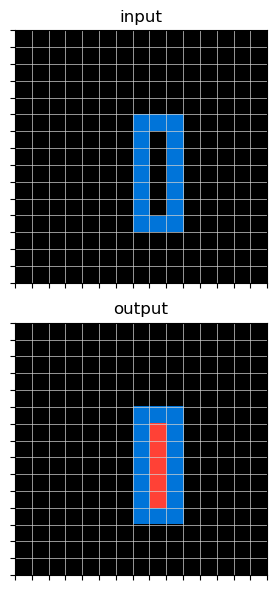

sample id=359346


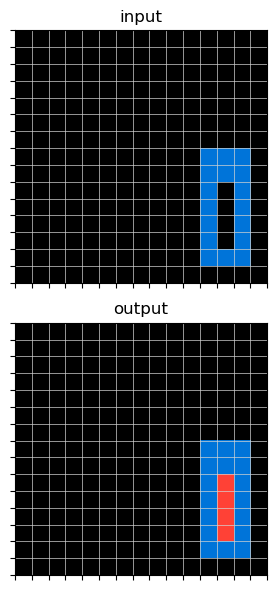

sample id=141370


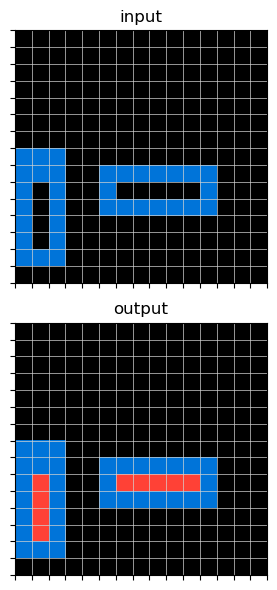

sample id=445917


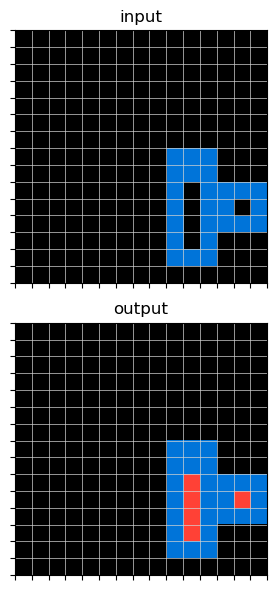

sample id=126362


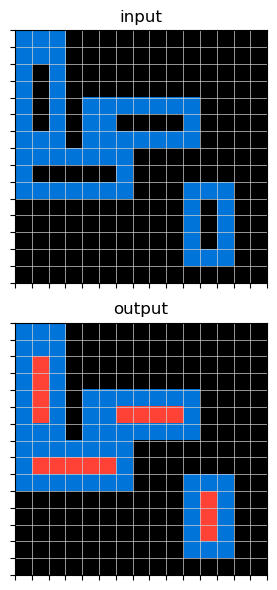

sample id=556536


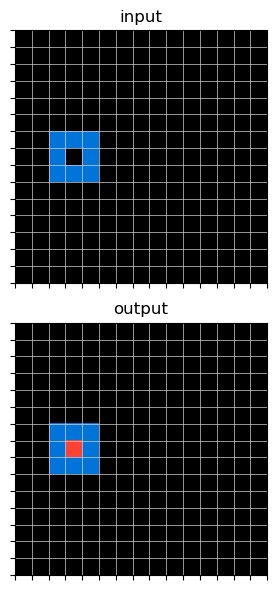

sample id=329192


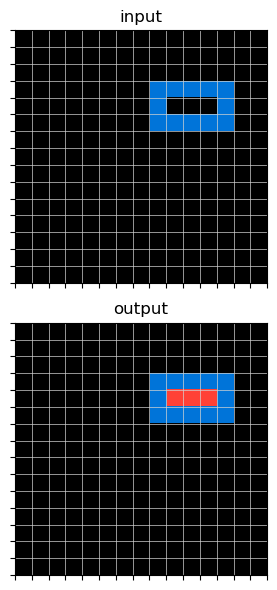

sample id=780861


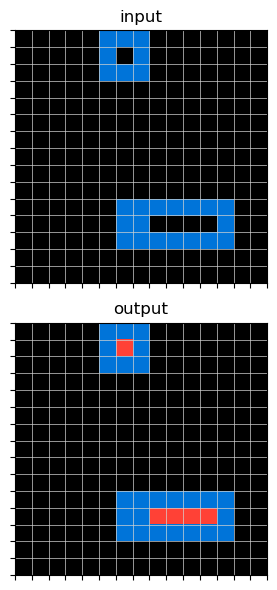

sample id=355966


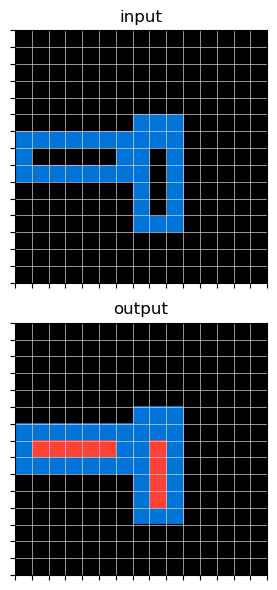

In [10]:
sample = np.random.choice(len(data), 10)

for i in sample:
    print(f"sample id={i}")
    plot_xy(data[i]['x'], data[i]['y'])